In [ ]:
# import required packages
from tensorflow.keras.layers import MaxPool2D, Conv2D, Dense, Flatten
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf
import pandas as pd
import numpy as np
import zipfile
import os


from google.colab import files

In [ ]:
# upload digit-recognizer zip file
file = files.upload()

# Unzip the dataset
local_zip = './digit-recognizer.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./digit_recognizer')
zip_ref.close()


Saving digit-recognizer.zip to digit-recognizer.zip


In [ ]:
# read in data
test = pd.read_csv(os.path.join("./digit_recognizer/test.csv"))
train = pd.read_csv(os.path.join("./digit_recognizer/train.csv"))


In [ ]:
# split train data into evaluation and train set
label = train.pop('label')
features = train
X_train, X_eval, Y_train, Y_eval = train_test_split(features, label, random_state=42, test_size=0.01)

In [ ]:
# vizualize digit array
import matplotlib.pyplot as plt
def visualize(i, eval=False, test_mode=False, sample=None):
  assert i is not None
  if test_mode:
    x = test.iloc[i]
    y = "unkonwn"

  elif eval:
    x = X_eval.iloc[i]
    y = Y_eval.iloc[i]

  elif sample is not None:
    x = sample.iloc[i, :]
    x.pop('label')
    y = sample['label'][i]

  else:
    x = X_train.iloc[i]
    y = Y_train.iloc[i]

  # Set number of characters per row when printing
  x = tf.reshape(x, shape=(28,28))
  np.set_printoptions(linewidth=320)

  # Print the label and image
  print(f'LABEL: {y}')
  print(f'\nIMAGE PIXEL ARRAY:\n {x}')

  # Visualize the image
  plt.imshow(x)

LABEL: 0

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  15  48 221 254 232   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  92 254 253 253 247 153  44   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 108 248 254 253 253 253 253 238 153   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 101 251 253 254 253 253 232 236 253 253 205   6   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 152 219 

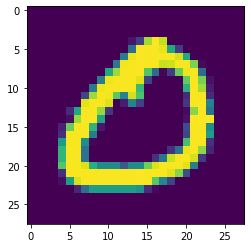

In [ ]:
visualize(i=20)

LABEL: 9

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  99 253 255 253 253 253 255 211  94   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  63 242 252 253 252 252 252 253 252 247 217  73  10   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  79 201 252 252 253 252 252 252 253 252 252 252 253  66  32   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1 191 252 252 252 

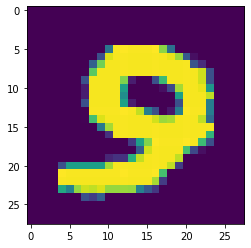

In [ ]:
visualize(i=20, eval=True)

In [ ]:
# define model
# using a conv net

class AccuracyAchievedCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    if logs.get("accuracy") is not None and logs["accuracy"] >= 0.999:
      print("\n high accuracy achieved")
      self.model.stop_training = True

model = keras.models.Sequential(
    layers = [
      Conv2D(filters=64, kernel_size=3, strides=1, input_shape=(28,28,1), padding="valid", activation="relu"),
      MaxPool2D(pool_size=2, strides=1),
      Conv2D(filters=128, kernel_size=3, strides=1, padding="valid", activation="relu"),
      MaxPool2D(pool_size=2, strides=1),
      Conv2D(filters=256, kernel_size=3, strides=1, padding="valid", activation="relu"),
      MaxPool2D(pool_size=2, strides=1),
      Conv2D(filters=512, kernel_size=3, strides=1, padding="valid", activation="relu"),
      MaxPool2D(pool_size=2, strides=1),
      Conv2D(filters=512, kernel_size=3, strides=1, padding="valid", activation="relu"),
      MaxPool2D(pool_size=2, strides=1),Flatten(),
      Dense(units=1024, activation='relu'),
      Dense(units=256, activation='relu'),
      Dense(units=64, activation="relu"),
      Dense(units=10, activation="softmax")    
    ]
    )

model.compile(optimizer=tf.keras.optimizers.RMSProp(learning_rate=0.001), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=["accuracy"],
              )


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 25, 25, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 23, 23, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 22, 22, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 20, 20, 256)       295168    
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 19, 19, 256)     

In [ ]:
# normalize x
m_train = X_train.shape[0]
m_eval = X_eval.shape[0]
X_train_norm = tf.reshape(tf.convert_to_tensor(X_train) / 255, shape=(m_train, 28,28,1))
X_eval_norm = tf.reshape(tf.convert_to_tensor(X_eval) / 255, shape=(m_eval, 28,28,1))

In [ ]:
# train for 40 epochs with a target accuracy >= 99.9
model.fit(
    X_train_norm, 
    Y_train, 
    epochs=40, 
    callbacks=[AccuracyAchievedCallback()], 
    )

Epoch 1/40
   5/1300 [..............................] - ETA: 51s - loss: 2.2974 - accuracy: 0.0938

1300/1300 [==============================] - 63s 41ms/step - loss: 0.4251 - accuracy: 0.8656
Epoch 2/40
1300/1300 [==============================] - 55s 42ms/step - loss: 0.0744 - accuracy: 0.9761
Epoch 3/40
1300/1300 [==============================] - 54s 42ms/step - loss: 0.0492 - accuracy: 0.9844
Epoch 4/40
1300/1300 [==============================] - 54s 42ms/step - loss: 0.0378 - accuracy: 0.9876
Epoch 5/40
1300/1300 [==============================] - 54s 41ms/step - loss: 0.0297 - accuracy: 0.9906
Epoch 6/40
1300/1300 [==============================] - 54s 41ms/step - loss: 0.0241 - accuracy: 0.9927
Epoch 7/40
1300/1300 [==============================] - 54s 42ms/step - loss: 0.0200 - accuracy: 0.9937
Epoch 8/40
1300/1300 [==============================] - 54s 42ms/step - loss: 0.0168 - accuracy: 0.9950
Epoch 9/40
1300/1300 [==============================] - 54s 42ms/step - loss: 0.0141 - accuracy: 0.9955
Epoch 10/40
1300/1300 [==============================] - 54s 42ms/step - lo

LABEL: unkonwn

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  29  85  85  85  85  85  85  85  85  71   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 107 128 168 250 250 250 252 250 250 250 250 231 127  63   0   0   0   0   0]
 [  0   0   0   0   0   0   0  85 168 237 25

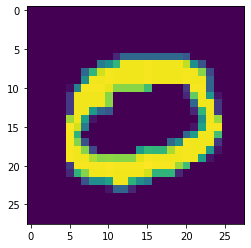

In [ ]:
# visualize a test example
p = tf.reshape(tf.convert_to_tensor(test.iloc[1,:]) / 255, shape=(1, 28, 28))
visualize(1, test_mode=True)

In [ ]:
# test prediction
print(tf.math.argmax(model.predict(p), axis=-1))

tf.Tensor([0], shape=(1,), dtype=int64)


In [ ]:
# evaluate model performance on evaluation set
model.evaluate(X_eval_norm, Y_eval)

14/14 [==============================] - 0s 18ms/step - loss: 0.0534 - accuracy: 0.9833


[0.053418077528476715, 0.9833333492279053]

In [ ]:
# get indices of  wrong predictions
eval_pred = model.predict(X_eval_norm)
eval_pred = tf.math.argmax(eval_pred, axis=-1)
wrong_indices = tf.where(eval_pred != Y_eval)
wrong_indices

<tf.Tensor: shape=(7, 1), dtype=int64, numpy=
array([[ 64],
       [ 65],
       [ 77],
       [139],
       [164],
       [316],
       [364]])>


i: [64]
LABEL: 30019    8
Name: label, dtype: int64

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 104  61 195 229 195 144  13   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  60 105 222 254 245 253 253 254 253 184  13   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  19 116 174 249 253 244 230 179  62  46  71 158 253 103   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  68 215 253 254 253 135  44   0   0   0   0   0  13  69  19   0   0]
 [  0   0   0   0   0   0   0   0   0   0  45 212 254 228 127   9   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 

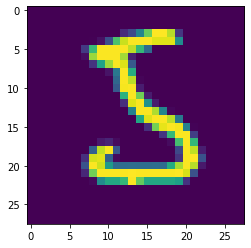

In [ ]:
# visualize wrong predictions
for i in wrong_indices:
  print(f'\ni: {i}')
  visualize(i, eval=True)

In [ ]:
# make prediction on test set
m_test = test.values.shape[0]
X_test = tf.reshape(tf.convert_to_tensor(test.values) / 255, shape=(m_test, 28,28))
predictions = model.predict(X_test)

In [ ]:
# convert to pandas and save predictions to csv file
index = test.index.values + 1
sample = test.iloc[:,:]
label = tf.math.argmax(predictions, axis=-1).numpy()
sample['label'] = label
df = pd.DataFrame({"ImageId" : index, "Label":label})
df.to_csv("./predictions.csv", index=False)